In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import matplotlib.dates as mdates


In [2]:
# Load the Excel file
excel_file = pd.ExcelFile('D:\Derivatives Trading\TAIEX derivatives trading record.xlsx')
sheet_name = 'ETF_PY'
df = excel_file.parse(sheet_name)

In [3]:
# Output data information
print(df.head())

        Date   PnL Index   Returns  US 20 YR Yield  Unnamed: 4  Unnamed: 5  \
0 2024-06-11  100.000000       NaN           4.627         NaN         NaN   
1 2024-06-12  100.470076  0.004701           4.536         NaN         NaN   
2 2024-06-13  101.126620  0.006535           4.493         NaN         NaN   
3 2024-06-14  101.701296  0.005683           4.467         NaN         NaN   
4 2024-06-17  101.825073  0.001217           4.520         NaN         NaN   

   HIBOR  SOFR  Unnamed: 8 Unnamed: 9  00688L  20 YR Yield  Unnamed: 12  \
0   4.40  5.32         NaN 2024-06-03    8.20     4.713511          NaN   
1   4.45  5.31         NaN 2024-06-04    8.39     4.683350          NaN   
2   4.50  5.31         NaN 2024-06-05    8.58     4.646344          NaN   
3   4.50  5.31         NaN 2024-06-06    8.69     4.614894          NaN   
4   4.52  5.33         NaN 2024-06-07    8.69     4.612333          NaN   

   Change  Change.1  
0     NaN       NaN  
1    0.19 -0.030161  
2    0.19 -0.0

In [4]:
# Generate data
Date = df["Date"]
Date
y1 =df["PnL Index"]
y1
y2 = df["US 20 YR Yield"]
y2

0     4.627
1     4.536
2     4.493
3     4.467
4     4.520
5     4.462
6     4.465
7     4.501
8     4.501
9     4.484
10    4.478
11    4.556
12    4.536
13    4.605
14    4.757
15    4.717
16    4.631
17    4.629
18      NaN
Name: US 20 YR Yield, dtype: float64

In [5]:
# Get the maximum PnL value
max_pnl = df['PnL Index'].max()
max_pnl_date = df.loc[df['PnL Index']==max_pnl, 'Date'].values[0]

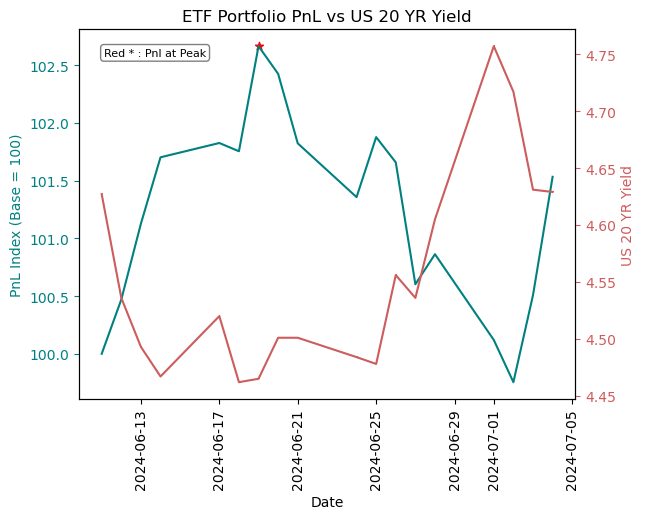

In [6]:
# Create the plot and set the first y-axis (left)
fig, ax1 = plt.subplots()
plt.xticks(rotation=90)
ax1.plot(Date, y1, color='teal', linestyle='-')
ax1.scatter(max_pnl_date, max_pnl, color='red', marker='*')
ax1.set_xlabel('Date')
ax1.set_ylabel('PnL Index (Base = 100)', color='teal')
ax1.tick_params('y', colors='teal')

# Set the second y-axis (right)
ax2 = ax1.twinx()
ax2.plot(Date, y2, color='indianred', marker=',')
ax2.set_ylabel('US 20 YR Yield', color='indianred')
ax2.tick_params('y', colors='indianred')

# Add message box
msg = "Red * : Pnl at Peak"
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax1.text(0.05, 0.95, msg, transform=ax1.transAxes, fontsize=8,
        verticalalignment='top', bbox=props)

# Show the plot
plt.title('ETF Portfolio PnL vs US 20 YR Yield')
plt.show()

In [7]:
#########################################################
#ETF Portfolio Allocation
sheet_name_2 = 'ETF_Allocation' 
df_2 = excel_file.parse(sheet_name_2)
ETF=df_2["ETF"]
Shares=df_2["Shares"]
df_2['Total'] = df_2['Shares'] * df_2['Value']  
total_value = df_2['Total'].sum() 
df_2['Percentage'] = (df_2['Total'] / total_value) * 100

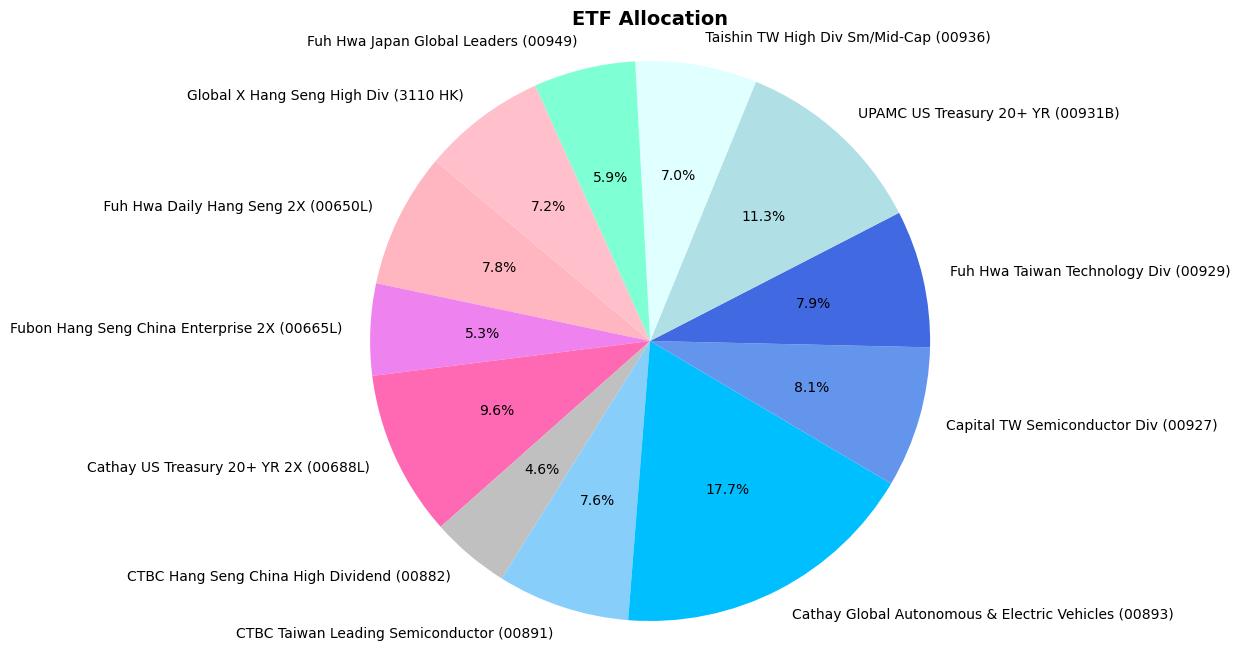

In [8]:
# Custom colors for the pie chart slices
colors = ['lightpink','violet','hotpink','silver','lightskyblue', 'deepskyblue', 'cornflowerblue','royalblue', 'powderblue','lightcyan','aquamarine','pink']

# Plotting the pie chart
plt.figure(figsize=(10, 8))  # Set the figure size
plt.pie(df_2['Percentage'], labels=df_2['ETF'], colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('ETF Allocation', fontweight='bold', fontsize=14)  
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Show the plot
plt.show()
